In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../..')
from keras import losses, metrics
from tensorflow.keras import optimizers
import gp2
from gp2 import Runner

2023-04-25 15:30:35.120323: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2023-04-25 15:30:36.571521: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2023-04-25 15:30:37.039983: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:0f:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-25 15:30:37.042565: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-25 15:30:37.045110: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 2 with properties: 
pciBusID: 0000:4e:00.0 name: A100-SXM

In [3]:
help(gp2.KUNetPlus2D)

Help on class KUNetPlus2D in module gp2.gp2.classifiers.k_unet_plus2d:

class KUNetPlus2D(gp2.gp2.classifiers.base_keras_segmentation_classifier.BaseKerasSegmentationClassifier)
 |  KUNetPlus2D(input_size=(512, 512, 1), filter_num=None, n_labels=1, stack_num_down=3, stack_num_up=3, activation='ReLU', output_activation='Sigmoid', batch_norm=True, pool=True, unpool=True, deep_supervision=False, backbone=None, weights='imagenet', freeze_backbone=True, freeze_batch_norm=True, name='xnet', optimizer=None, loss=None, metric=None, verbose=False, workingdir='/tmp')
 |  
 |  Keras U-net++ 2D model.
 |  
 |  Method resolution order:
 |      KUNetPlus2D
 |      gp2.gp2.classifiers.base_keras_segmentation_classifier.BaseKerasSegmentationClassifier
 |      gp2.gp2.classifiers.classifier.Classifier
 |      abc.ABC
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, input_size=(512, 512, 1), filter_num=None, n_labels=1, stack_num_down=3, stack_num_up=3, activation='ReLU', o

In [4]:
R = Runner(verbose=True, 
           classifier='kunetplus2d',
           discriminator='cnnplus',
           filter_num= [16, 32, 64, 128, 256, 512, 1024],
           stack_num_down=3, 
           stack_num_up=3, 
           activation='ReLU', 
           output_activation='Sigmoid', 
           batch_norm=True, 
           pool=True, 
           unpool=True, 
           deep_supervision=False,
           weights=None, 
           freeze_backbone=True, 
           freeze_batch_norm=True,
           optimizer=None, 
           loss=gp2.Util.hybrid_loss, 
           metric=None           
          )

2023-04-25 15:30:40.689017: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-25 15:30:41.413234: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:0f:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-25 15:30:41.417374: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 1 with properties: 
pciBusID: 0000:47:00.0 name: A100-SXM4-40GB computeCapability: 8.0
coreClock: 1.41GHz coreCount: 108 deviceMemorySize: 39.59GiB deviceMemoryBandwidth: 1.41TiB/s
2023-04-25 15:30:41.421264: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 2 

*** GP2  KUNetPlus2D ***
Working directory: /tmp/tmpwf7pfgumGP2
Verbose mode active!
{'verbose': True, 'workingdir': '/tmp/tmpwf7pfgumGP2', 'input_size': (512, 512, 1), 'filter_num': [16, 32, 64, 128, 256, 512, 1024], 'n_labels': 1, 'stack_num_down': 3, 'stack_num_up': 3, 'activation': 'ReLU', 'output_activation': 'Sigmoid', 'batch_norm': True, 'pool': True, 'unpool': True, 'deep_supervision': False, 'backbone': None, 'weights': 'imagenet', 'freeze_backbone': True, 'freeze_batch_norm': True, 'name': 'xnet', 'optimizer': <tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x7f71fb85a190>, 'loss': <tensorflow.python.eager.def_function.Function object at 0x7f7203871e80>, 'metric': [<tensorflow.python.eager.def_function.Function object at 0x7f7203871be0>], 'model': <tensorflow.python.keras.engine.functional.Functional object at 0x7f720dac8670>}
Model summary:
Model: "xnet_model"
_________________________________________________________________
Layer (type)                 Output Shap

In [5]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/GP2TOYEXAMPLE_LARGE/masks.npy')

In [6]:
images = images[:5000]
masks = masks[:5000]

In [7]:
images.shape

(5000, 512, 512, 1)

In [8]:
masks.shape

(5000, 512, 512, 1)

In [9]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.1,
    'A_test': 0.8,
    'B': 0.4,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.1
}

In [ ]:
R.run(images=images, masks=masks, weights=weights, runs=5)     

Weights OK!
******
Loop 0


2023-04-25 15:30:49.987065: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2023-04-25 15:30:50.007003: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2245755000 Hz


Epoch 1/100


2023-04-25 15:30:54.587682: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2023-04-25 15:30:55.230374: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8201
2023-04-25 15:30:55.906716: W tensorflow/stream_executor/gpu/asm_compiler.cc:191] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.0
2023-04-25 15:30:55.906740: W tensorflow/stream_executor/gpu/asm_compiler.cc:194] Used ptxas at ptxas
2023-04-25 15:30:55.906799: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Unimplemented: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-04-25 15:30:55.923884: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2023-04-25 15:30:56.683534: I tensorflow/stream_exec

4/4 [==============================] - 35s 5s/step - loss: 1.8007 - dice_coef: 0.1527 - val_loss: 1.7882 - val_dice_coef: 0.1615


2023-04-25 15:31:29.475099: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


Epoch 2/100
4/4 [==============================] - 3s 858ms/step - loss: 1.7460 - dice_coef: 0.1924 - val_loss: 1.7883 - val_dice_coef: 0.1615
Epoch 3/100
4/4 [==============================] - 3s 871ms/step - loss: 1.6610 - dice_coef: 0.2520 - val_loss: 1.7885 - val_dice_coef: 0.1613
Epoch 4/100
4/4 [==============================] - 3s 858ms/step - loss: 1.5872 - dice_coef: 0.3015 - val_loss: 1.7888 - val_dice_coef: 0.1611
Epoch 5/100
4/4 [==============================] - 3s 858ms/step - loss: 1.5408 - dice_coef: 0.3316 - val_loss: 1.7894 - val_dice_coef: 0.1607
Epoch 6/100
4/4 [==============================] - 3s 853ms/step - loss: 1.4942 - dice_coef: 0.3612 - val_loss: 1.7899 - val_dice_coef: 0.1603
Epoch 7/100
4/4 [==============================] - 3s 869ms/step - loss: 1.4552 - dice_coef: 0.3856 - val_loss: 1.7903 - val_dice_coef: 0.1600
Epoch 8/100
4/4 [==============================] - 3s 874ms/step - loss: 1.4164 - dice_coef: 0.4093 - val_loss: 1.7908 - val_dice_coef: 0.1597

Replacing 66 from 200 !
D_relabeled_ 66
selected_ids ['787ebd9b-1721-4d90-82cb-c44560d11f3a', '568be155-ad7e-4782-9b20-6bc357b94305', '38109aa1-d57f-48ea-be52-41e91abc5959', '9e4ae135-4abf-4652-8bd7-a03e524557bb', '09ae8d18-8c2b-4b33-ae07-caf59853b112', '01e7ef16-568e-40d5-942e-cb266cca1acd', '51b34163-a172-4584-951b-2970c92dee72', '9043fc1e-2a79-4d4a-905c-6b20c9b737d6', 'ad63552d-b21f-40e7-a0f7-4fb2a36de0c0', '64bee803-a9d5-4e13-821e-62d023b6c6d2', 'c11442e7-1e6d-4689-aa48-9324029e470d', 'd835821b-ca6d-42eb-9b21-43fff96ca677', '63cbee59-2b64-40df-89a2-89cab8277a75', 'c25b4493-2713-4b8d-a4fb-a13099be0004', '2b6cbf6e-cb76-4af1-8bb0-275e55526037', '03e6f19d-f69c-4ad2-b4b2-6e871cdd6ff7', '0bf34cda-4cf9-46fb-8247-7d3f26887b2a', '8c64a264-bc11-4b31-bf11-526d340fb46e', 'd3b90124-5ae0-4fab-8004-6facb3a940be', 'a8e33e50-598a-49d8-b3aa-9e5989ca8c8f', '1b171f76-78df-41cb-975a-9557af1535d4', '73de0aa2-d532-4cd0-9b6f-8348ccb1cd9a', 'ac0f2e97-4d1f-4e9b-9509-79a23600761a', 'b8334a1c-fdff-4180-80d7-4

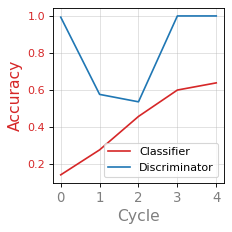

In [11]:
R.plot()